<h1><center></center></h1><hr>
<h1><center><b>Iris Flower Classification<hr>
</center></h1>

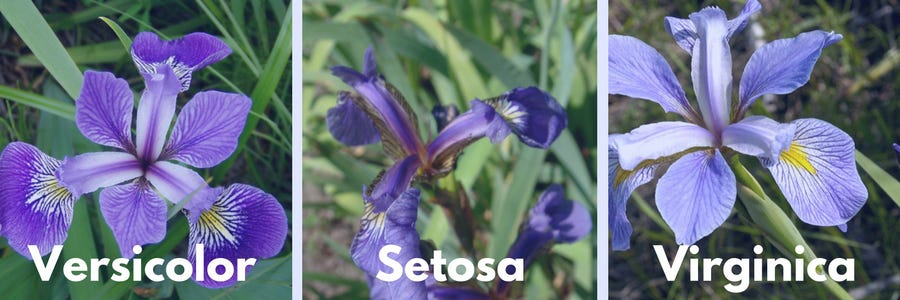

# Table of Contents:
1. <a href='#busund'>Business Understanding</a>


2. <a href='#dataund'>Data Understanding : Exploratory Data Analysis</a>


3. <a href='#prepro'>Data Preparation : Data Pre-Processing</a>


4. <a href='#Visualization'>Data Visualization</a>


5. <a href='#modeling'>Modeling</a>

     5.1. <a href='#modelb'>Model Building</a>
   
     5.2. <a href='#evaluation'>Evaluation</a>

     5.3. <a href='#modelc'>Model Comparison</a>

<br><br>
<hr><hr>

# **1 | <a id='busund' style="color:#000000;">Business Understanding</a>**

Classifying flowers based on their characteristics is essential in botany and agriculture. This project aims to develop a machine learning model that can classify Iris flowers into three species: Setosa, Versicolor, and Virginica. The classification is based on four key features: sepal length, sepal width, petal length, and petal width. A reliable classification model can assist botanists, researchers, and horticulturists in accurately identifying flower species, making it useful for ecological research and conservation efforts.

<strong><h3>About Dataset</h3></strong>
<blockquote>
<div class="alert alert-primary" style="margin-top: 20px">
<p>
The Iris dataset, introduced by Ronald Fisher in 1936, is one of the most well-known datasets in machine learning. It consists of 150 records and 6 variables, providing information about three different Iris flower species. Each record represents a single flower sample with four numerical attributes related to its physical dimensions. The dataset is widely used for testing classification algorithms due to its simplicity and balanced class distribution.
 </blockquote></p>

---
<strong><h3>key features</h3></strong>
<blockquote>

* ID – A unique identifier for each record in the dataset (not used in classification).
* Sepal Length (cm) – The length of the sepal in centimeters.
* Sepal Width (cm) – The width of the sepal in centimeters.
* Petal Length (cm) – The length of the petal in centimeters.
* Petal Width (cm) – The width of the petal in centimeters.
</blockquote>

---

<strong><h3>Target Feature</h3></strong>
<blockquote>  

The<strong>  species</strong> of the Iris flower is the target variable in this classification problem. The model will predict whether a given flower belongs to one of the three species based on its sepal and petal measurements.
</blockquote>  



# **2 | <a id='dataund' style="color:#000000;">Data Understanding : Exploratory Data Analysis</a>**

#####  **Import the necessary libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import f1_score, confusion_matrix, log_loss, classification_report, matthews_corrcoef, accuracy_score,ConfusionMatrixDisplay




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####  **Load data**

In [6]:
# Load Data
df= pd.read_csv("/content/drive/MyDrive/CodeAlpha/iris classification/Iris.csv")

##### **Preview Data**

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### **DataFrame Shape**

In [ ]:
df.shape

(150, 6)

##### **DataFrame Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### **Statistical summary of data**

In [ ]:
# statistical summary of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### **Missing Values Count**

In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


##### **Check for Duplicate Rows**

In [ ]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


##### **Detecting Outliers**

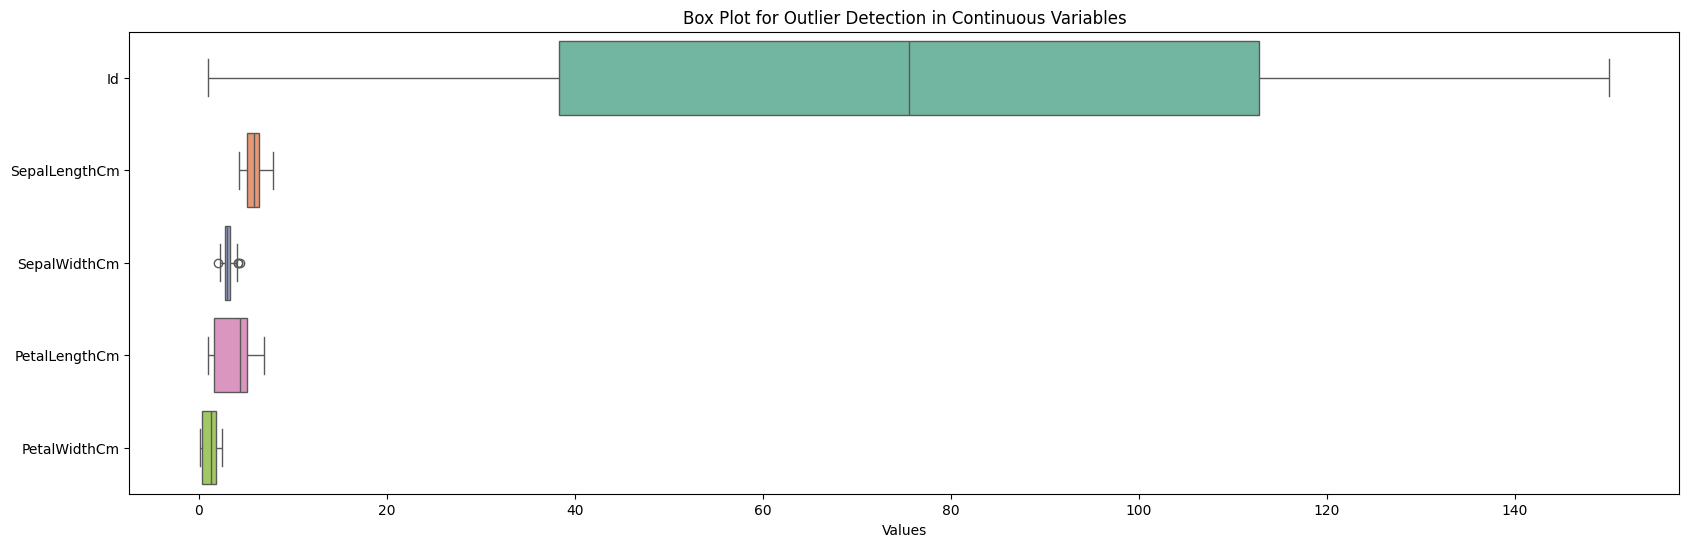

In [ ]:
# Create a box plot to visualize outliers for continuous variables only
plt.figure(figsize=(20, 6))

# Use seaborn to draw a box plot for specified continuous variables
sns.boxplot(data=df, orient="h", palette="Set2")

# Add titles and labels
plt.title("Box Plot for Outlier Detection in Continuous Variables")
plt.xlabel("Values")

# Display the box plot
plt.show()

After performing Exploratory Data Analysis (EDA), we concluded that:

* ID is a useless column and can be removed.
* No duplicate rows founded.

# **3 | <a id='prepro' style="color:#000000;" >Data Preparation : Pre-Processing</a>**

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#####  **Drop useless column**

In [ ]:
df.drop(columns=["Id"], inplace=True)  # Drop 'Id' (not useful for prediction)


#####  **Normalization**

In [ ]:
# Initialisation du scaler
scaler = StandardScaler()

columns_to_scale = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Transformation et remplacement dans le DataFrame
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


#####  **Label Encoding**

In [ ]:
print(df["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Species' column
df['Species'] = label_encoder.fit_transform(df['Species'])


In [ ]:
print(df["Species"].unique())

[0 1 2]


In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


##### **X-y Split**

In [ ]:
X = df.drop(columns=["Species"])  # Features
y = df["Species"]  # Target variable

##### **Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4 | <a id='Visualization' style="color:#000000;">Data Visualization</a>**

###### **1 |  Count of Instances for Each Flower Type**

<ipython-input-38-6ad7b2de8850>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='Set2')


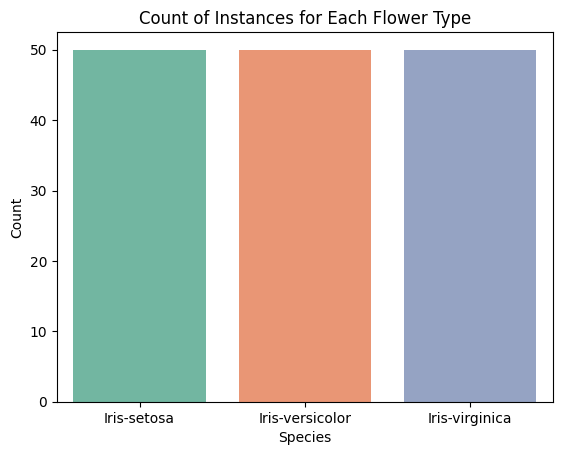

In [ ]:
# Countplot for the number of instances in each flower type
sns.countplot(x='Species', data=df, palette='Set2')
plt.title('Count of Instances for Each Flower Type')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

###### **2 |  Sepal Length vs Petal Length by Species**

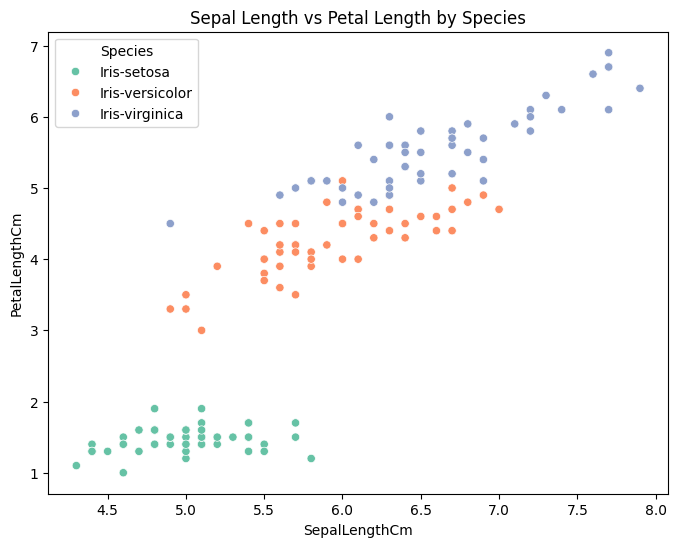

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df, palette='Set2')
plt.title('Sepal Length vs Petal Length by Species')
plt.show()

###### **3 |  Correlation Heatmap**

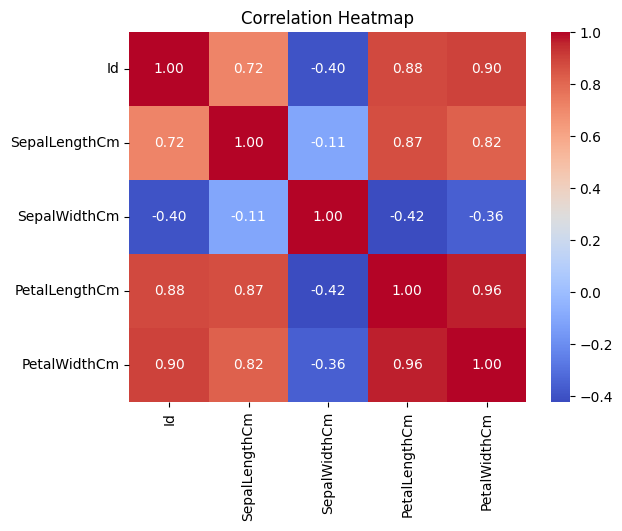

In [ ]:
corr_matrix = df.drop(columns='Species').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

###### **4 |  Pairplot of Iris Dataset**

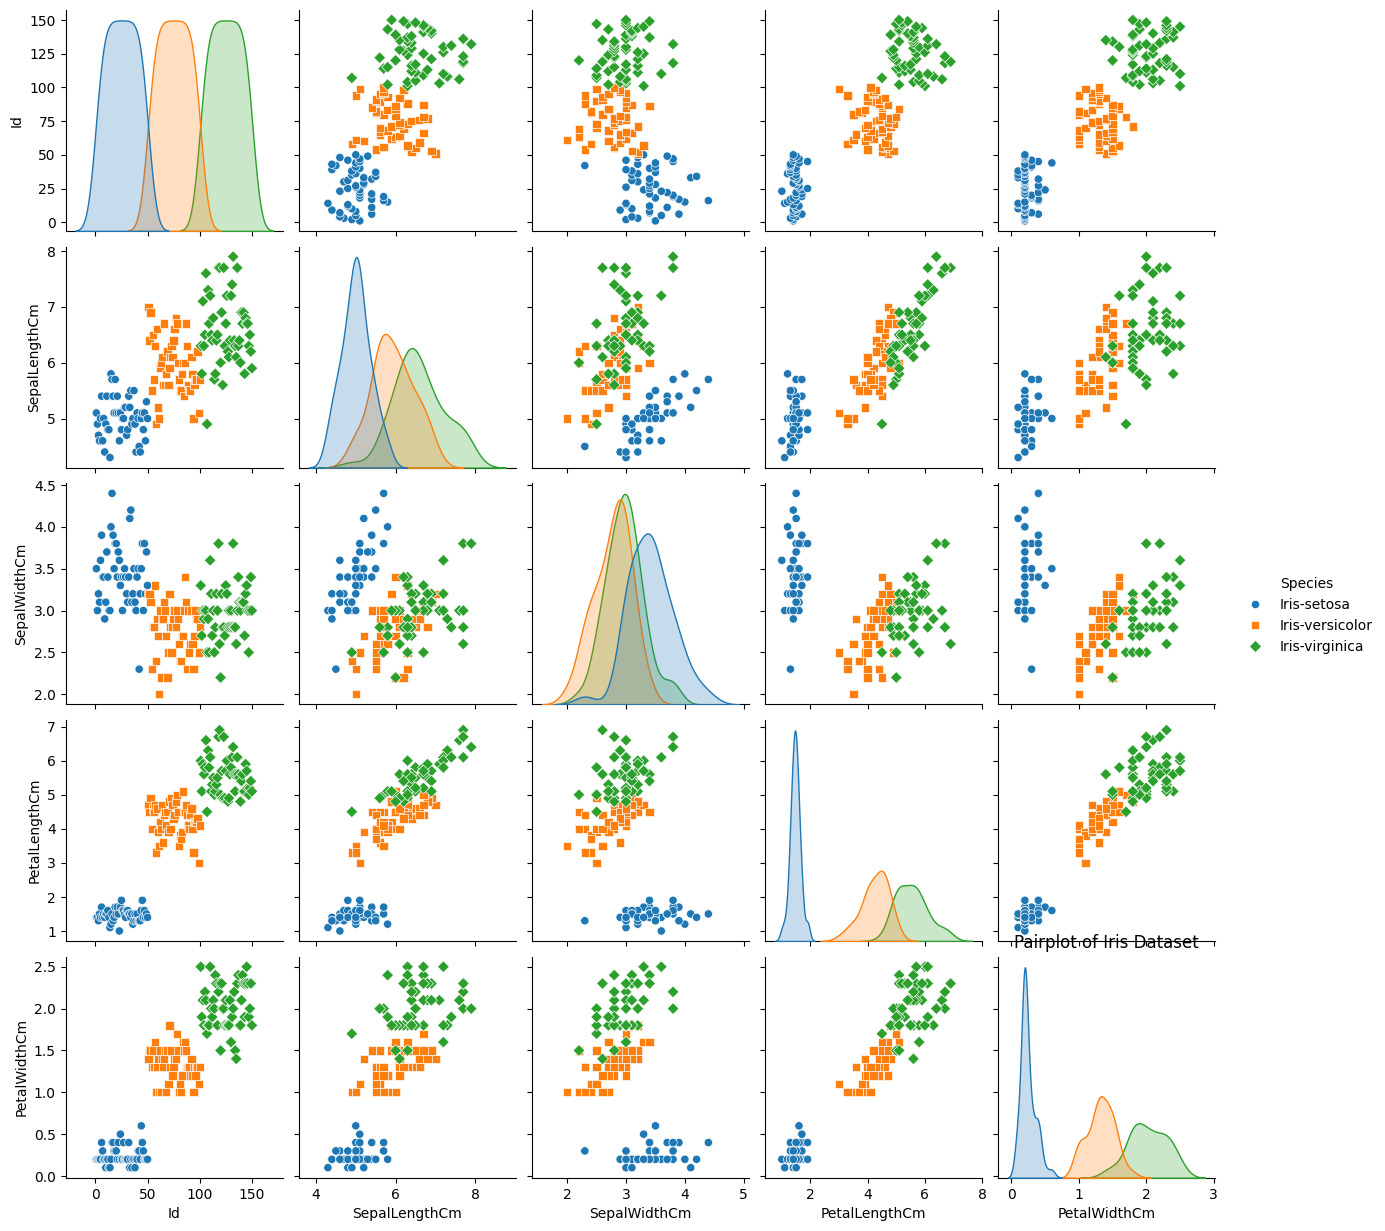

In [ ]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Dataset')
plt.show()

# **5 | <a id='#modeling' style="color:#000000;">Modeling</a>**

### **5.1 |  <a id='modelb' style="color:#708197;" >Model Building</a>**

###### **1 |  Linear Regression**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR= LR.predict(X_test)

###### **2 |  Random Forest**

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF= RF.predict(X_test)

###### **3 |  Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_train_pred_DT = DT.predict(X_train)
y_test_pred_DT= DT.predict(X_test)

###### **4 |  XGBoost**

In [ ]:
# Creating the model
xgb = XGBClassifier()
# Training the model
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb= xgb.predict(X_test)

###### **5 |  SVC**

In [ ]:
SVC = SVC(probability=True)
SVC.fit(X_train, y_train)
y_train_pred_SVC = SVC.predict(X_train)
y_test_pred_SVC= SVC.predict(X_test)

### **5.2 |  <a id='evaluation' style="color:#708197;" >Evaluation</a>**

In [ ]:
# Create an empty DataFrame to store the values
compa = pd.DataFrame(columns=['Model', 'Accuracy - Train', 'Accuracy - Test', 'MCC', 'F1'])

def metrics(model, y_train_pred, y_test_pred, y_train, y_test):
    global compa  # Use the global DataFrame to update it
    # Calculate accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Display results
    print("Accuracy - Train:", train_accuracy)
    print("Accuracy - Test:", test_accuracy)

    # Calculate and display the MCC (Matthews Correlation Coefficient)
    mcc = matthews_corrcoef(y_test, y_test_pred)
    print("MCC:", mcc)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_test_pred, average='macro')
    print('F1:', f1)

    # Create a new row of results as a DataFrame
    new_row = pd.DataFrame({
        'Model': [model.__class__.__name__],  # Model name used
        'Accuracy - Train': [train_accuracy],
        'Accuracy - Test': [test_accuracy],
        'MCC': [mcc],
        'F1': [f1]
    })

    # Add the new row to the DataFrame `compa` using `concat`
    compa = pd.concat([compa, new_row], ignore_index=True)



# Function to display the confusion matrix
def plot_confusion_matrix(model, y_test, y_test_pred):
    # Display the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(confusion_mat)
    plt.style.use('classic')
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

# Function to display the classification report
def print_classification_report(y_test, y_test_pred):
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:\n', report)

###### **1 |  Linear Regression**

In [ ]:
metrics(LR, y_train_pred_LR, y_test_pred_LR,y_train,y_test)

Accuracy - Train: 0.9666666666666667
Accuracy - Test: 1.0
MCC: 1.0
F1: 1.0


<ipython-input-62-48342cd12327>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compa = pd.concat([compa, new_row], ignore_index=True)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


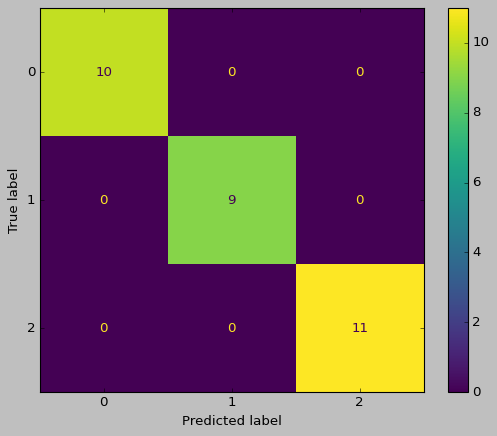

In [ ]:
plot_confusion_matrix(LR,y_test, y_test_pred_LR)

In [ ]:
print_classification_report(y_test, y_test_pred_LR)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###### **2 |  Random Forest**

In [ ]:
metrics(RF, y_train_pred_RF, y_test_pred_RF,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 1.0
MCC: 1.0
F1: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


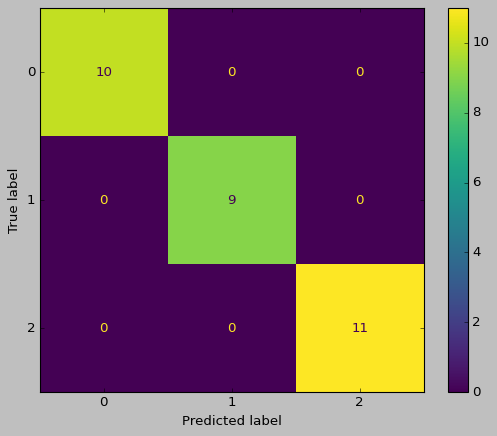

In [ ]:
plot_confusion_matrix(RF,y_test, y_test_pred_RF)

In [ ]:
print_classification_report(y_test, y_test_pred_RF)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###### **3 |  Decision Tree**

In [ ]:
metrics(DT, y_train_pred_DT, y_test_pred_DT,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 1.0
MCC: 1.0
F1: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


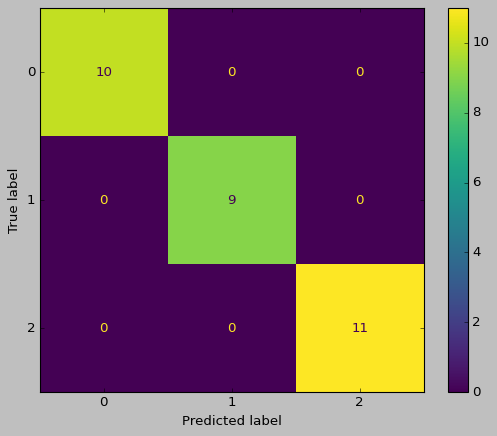

In [ ]:
plot_confusion_matrix(DT,y_test, y_test_pred_DT)

In [ ]:
print_classification_report(y_test, y_test_pred_DT)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###### **4 |  XGBoost**

In [ ]:
metrics(xgb, y_train_pred_xgb, y_test_pred_xgb,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 1.0
MCC: 1.0
F1: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


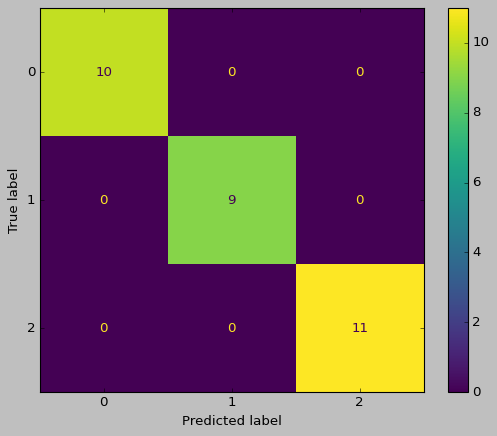

In [ ]:
plot_confusion_matrix(xgb,y_test, y_test_pred_xgb)

In [ ]:
print_classification_report(y_test, y_test_pred_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###### **5 |  SVC**

In [ ]:
metrics(SVC, y_train_pred_SVC, y_test_pred_SVC,y_train,y_test)

Accuracy - Train: 0.975
Accuracy - Test: 1.0
MCC: 1.0
F1: 1.0


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


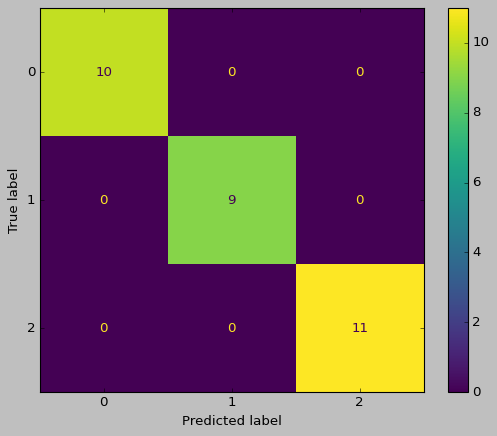

In [ ]:
plot_confusion_matrix(SVC,y_test, y_test_pred_SVC)

In [ ]:
print_classification_report(y_test, y_test_pred_SVC)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **5.3 |  <a id='modelc' style="color:#708197;" >Model Comparison</a>**

In [ ]:
compa.sort_values(by='MCC', ascending=False)

,Model,Accuracy - Train,Accuracy - Test,MCC,F1
0,LogisticRegression,0.966667,1.0,1.0,1.0
1,RandomForestClassifier,1.000000,1.0,1.0,1.0
2,DecisionTreeClassifier,1.000000,1.0,1.0,1.0
3,XGBClassifier,1.000000,1.0,1.0,1.0
4,SVC,0.975000,1.0,1.0,1.0


<hr><hr>AZZUBHI Rihana<hr><hr>